In [12]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import MeCab
from konlpy.tag import Okt

import sys
sys.path.append('/Users/anhyojun/WorkSpace/KDT2/MyModule')
from KDTModule import *

import torch.optim as optim
from torch.utils.data import DataLoader

import pandas as pd
import joblib

from deep_translator import GoogleTranslator

In [3]:
# 시드 설정
torch.manual_seed(1)

In [4]:
text_list = []
label_list = []
PATH = '/Users/anhyojun/WorkSpace/KDT2/김소현 강사님/프로젝트/6번째 프로젝트/txt/'
txt_name = ['domestic2.txt', 'game2.txt', 'habby2.txt', 'overseas2.txt',
            'photo2.txt', 'restaurant2.txt', 'sports2.txt', 'vehicle2.txt']
for index, name in enumerate(txt_name):
    with open(PATH+name, 'r', encoding='utf-8') as f:
        text_list += f.readlines()
        label_list += [index] * 1000

In [5]:
text_list[:5], label_list[:5]

(['  산청펜션 맑은하늘펜션 자연의 평온한 분위기  산청펜션 맑은하늘펜션 자연의 평온한 분위기 안녕하세요 ෆ 일상에 지쳤다면, 산청펜션 맑은하늘펜션에서 힐링 어떠신가요? 경남 산청에 위치한 이 펜션은 일므 그대로 맑은 하늘과 깨끗한 자연이 자랑 인데요 특히 가족 단위나 친구들과 함께 가기에도 딱 좋은 힐링 공간이랍니다 맑은하늘펜션 산청펜션 맑은하늘펜션은 지리산의 맑은 공기와 자연을 만끽할 수 있는 곳이에요 봄에는 꽃구경, 여름에는 시원한 계곡, 가을에는 단풍, 겨울에는 조용한 휴식까지 사계절 내내 다양한 즐길 거리가 있어요 특히 주변에 다양한 산행 코스와 계곡이 있어서 자연 속에서 휴식과 힐링을 할 수 있죠 이곳에 오는 것만으로도 스트레스가 풀리고 힐링되는 느낌을 받을 수 있답니다 :) 가족 단위로 방문하면 아이들은 자연 속에서 마음껏 뛰놀 수 있고, 어른들은 조용하게 휴식을 취할 수 있고요 친구나 동호회 모임 등 단체루 방문해도 좋은데요 대형객실과 다양한 편의시설이 마련되어 있어서 많은 인원이 함께 머물기에도 편해요 자연과 함께하는 워크샵이나 힐링을 원하는 회사 단체 방문객도 만족할 만한 장소랍니다 객실은 편안하고 세련되게 꾸며져 있으며 자연을 배경으로 하여 평... \n',
  '  2024 대구 정원박람회 / 대구 금호강 하중도 금호꽃섬 코스모스 댑싸리 / 기본정보 일정 주차  대구에서 펼쳐지는 대한민국 정원 르네상스! 🌱✨ 2024 대구 정원박람회가 10월 11일부터 10월 15일까지 금호강 하중도에서 열립니다~! 시민, 학생, 가족 등 다양한 참여자들이 정성껏 가꾼 이색 정원 전시와🌼👩🎨 트렌드를 알아볼 수 있는 정원산업전,🌱 공연과 전시, 체험으로 알찬 정원 페스티벌까지!🎈 꽃과 자연의 아름다움이 가득한 2024 대구정원박람회에서 힐링의 시간을 가져보세요💕 2024 대구정원박람회 📍위치: 대구 북구 노곡동 665 (하중도) 📅일시: 10월 11일부터 15일까지 🚗주차: 노곡체육공원 주차장 이용 🚃대중교통: 북구3, 칠곡2 하차 후 노곡교 인도 이용

In [40]:
domestic = text_list[:300]
game = text_list[1000:1300]
habby = text_list[2000:2300]
overseas = text_list[3000:3300]
photo = text_list[4082:4300]
restaurant = text_list[5000:5300]
sports = text_list[6000:6300]
vehicle = text_list[7000:7300]

all_data = photo + restaurant + sports + vehicle

In [43]:
# 데이터 증강
translated_korean_list = []

for index, text in enumerate(all_data):
    english = GoogleTranslator(source='ko', target='en').translate(text)
    if index % 30 == 0:
        print(english)
    korean = GoogleTranslator(source='en', target='ko').translate(english)
    if index % 30 == 0:
        print(korean)
    translated_korean_list.append(korean)

Recommended shooting location: Hwangsando, Haida NanoPro ND64 67mm filter Recommended shooting location: Hwangsando, Haida NanoPro ND64 67mm filter Hello. I am a photo & IT creator, Jayubunbang. In the previous article, I introduced the Haida magnetic filter kit. Basically, the ND filter is a neutral density filter that acts like sunglasses to reduce the amount of light and slow down the shutter speed, making it a good filter to use when taking special photos. There are various types of ND filters. The Haida magnetic filter kit introduced in the previous article contained ND 1000, 64, and 8, and in this article, I will introduce a filter that shows the ND64 value with a 67mm fixed filter. The purpose may be slightly different, but ND64 often does not exceed 30 seconds when used during the day, so it has the advantage of being able to shoot comfortably without a release. It is used for the purpose of hiding the appearance of pedestrians passing by during the day or taking calm shots at 

In [45]:
label_list3 = ([4] * 218 + [5] * 300 + [6] * 300 + [7] * 300)
len(translated_korean_list), len(label_list3)

(1118, 1118)

In [46]:
total_clean_text = []
for i in translated_korean_list:
    token = Okt().morphs(i)
    clean_text = remove_stopwords(token, 'stopword.txt')
    clean_text = remove_punctuation(clean_text)
    total_clean_text.append(' '.join(clean_text))

df = pd.DataFrame({'clean_text' : total_clean_text,
                   'label' : label_list3})

df.to_csv('clean_text3.csv', index=False)

In [48]:
df = pd.read_csv('clean_text.csv')
df2 = pd.read_csv('clean_text2.csv')
df3 = pd.read_csv('clean_text3.csv')
total_df = pd.concat([df, df2, df3])
total_df

,clean_text,label
0,산청 펜션 맑은 하늘 펜션 자연 의 평온한 분위기 산청 펜션 맑은 하늘 펜션 자연 ...,0
1,대구 정원 박람회 대구 금호강 하중도 금호 꽃섬 코스모스 댑싸리 기본 정보 일정 주...,0
2,쭈꾸미 배 낚시 가격 태안 대박 호펜션 쭈꾸미 낚시 체험 예약 쭈꾸미 배 낚시 가격...,0
3,서귀포 배 낚시 후기 서귀포 바다 배 낚시 체험 광고 가 포함 된 리뷰 입니다 안녕...,0
4,성수 타이레놀 팝업 스토어 후기 나 만의 잡지 선물 오늘 의 팝업 여행 은 타이레놀...,0
...,...,...
1113,현대 투싼 하이브리드 인스피 레이 션 소형차 로는 너무 넓고 SUV 로는 연비 가 ...,7
1114,원 이 넘지만 전 세계 적 으로 판매 되지 않는 고급 SUV 가 있습니다 바로 랜드...,7
1115,기아 카니발 하이 리무진 인승 을 빠르게 배송 하는 방법 기아 카니발 하이 리무진 ...,7
1116,대구 자율 주행 교육 초보자 에서 베테 랑 까지 안녕하세요 대 구 자율 주행 교육 ...,7


In [50]:
total_df['label'].value_counts()

label
0    1300
1    1300
2    1300
3    1300
4    1300
5    1300
6    1300
7    1300
Name: count, dtype: int64

In [51]:
# 훈련, 검증, 테스트 데이터 분리
featureDF = total_df[['clean_text']]
targetDF = total_df[['label']]

train_inputDF, test_inputDF, train_targetDF, test_targetDF = train_test_split(featureDF, targetDF,
                                                                      stratify = targetDF,
                                                                      train_size = 0.8, random_state = 42)
train_inputDF, valid_inputDF, train_targetDF, valid_targetDF = train_test_split(train_inputDF, train_targetDF,
                                                                        stratify = train_targetDF,
                                                                        train_size = 0.8, random_state = 42)

In [52]:
print(f"[train] input : {train_inputDF.shape}, target : {train_targetDF.shape}")
print(f"[valid] input : {valid_inputDF.shape}, target : {valid_targetDF.shape}")
print(f"[test] input : {test_inputDF.shape}, target : {test_targetDF.shape}")

[train] input : (6656, 1), target : (6656, 1)
[valid] input : (1664, 1), target : (1664, 1)
[test] input : (2080, 1), target : (2080, 1)


In [53]:
vectorizer = TfidfVectorizer(max_features = 8000) 
a = []
b = vectorizer.fit_transform(train_inputDF['clean_text'])
for i in b:
    a.append(i)
    break

In [54]:
for i in a:
    print(i)

  (0, 2383)	0.07046606062755476
  (0, 4311)	0.08222779525874647
  (0, 5674)	0.04746620369163983
  (0, 1288)	0.08618864753342367
  (0, 7706)	0.05137681709333266
  (0, 4169)	0.07440029502745549
  (0, 4400)	0.056386405455272
  (0, 3464)	0.041203718910873675
  (0, 213)	0.050335247760252
  (0, 5349)	0.059138871590154116
  (0, 5377)	0.05361647631393169
  (0, 1416)	0.049828906271078346
  (0, 431)	0.04562796534061141
  (0, 434)	0.05836241202796319
  (0, 2348)	0.06685068721399119
  (0, 207)	0.09432575233427447
  (0, 474)	0.044442004391343354
  (0, 743)	0.08184557820053562
  (0, 4526)	0.08723021686650433
  (0, 1825)	0.0740584668226097
  (0, 4422)	0.05893063701425215
  (0, 5759)	0.09665292929214285
  (0, 6284)	0.07245660158200781
  (0, 1418)	0.09193708133048538
  (0, 5455)	0.10776113288600879
  :	:
  (0, 4731)	0.019636904407904048
  (0, 1945)	0.065197311503925
  (0, 6674)	0.07577751414330884
  (0, 2972)	0.15326204980986677
  (0, 7436)	0.052273127882542
  (0, 4928)	0.08743048068495989
  (0, 7017)	

In [55]:
vectorizer = TfidfVectorizer(max_features = 5000) # 최대 8000개의 특징 선택
train_vectors = vectorizer.fit_transform(train_inputDF['clean_text']).toarray()
valid_vectors = vectorizer.transform(valid_inputDF['clean_text']).toarray()
test_vectors = vectorizer.transform(test_inputDF['clean_text']).toarray()

joblib.dump(vectorizer, 'tfid_vectorizer_5000.pkl')

['tfid_vectorizer_5000.pkl']

In [56]:
train_vectorsDF = pd.DataFrame(train_vectors)
valid_vectorsDF = pd.DataFrame(valid_vectors)
test_vectorsDF = pd.DataFrame(test_vectors)
train_vectorsDF

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6652,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6653,0.0,0.0,0.0,0.0,0.0,0.0,0.124929,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6654,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
trainDS = CustomDataset(train_vectorsDF, train_targetDF, feature_dim=2)
validDS = CustomDataset(valid_vectorsDF, valid_targetDF, feature_dim=2)
testDS = CustomDataset(test_vectorsDF, test_targetDF, feature_dim=2)

trainDL = DataLoader(trainDS, batch_size=16)
validDL = DataLoader(validDS, batch_size=16)
testDL = DataLoader(testDS, batch_size=16)

In [58]:
trainDL.dataset[0]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.]]), tensor([5.]))

In [59]:
for X_batch, y_batch in trainDL:
    print(X_batch.shape)  # X_batch의 차원 출력
    break  # 첫 번째 배치만 확인하기 위해 루프를 중지

torch.Size([16, 1, 5000])


In [60]:
trainDL.dataset[0][0].shape

torch.Size([1, 5000])

In [61]:
model = LSTMModel(input_size = 5000, output_size = 8, hidden_list = [100, 30],
                  act_func=F.relu, model_type='multiclass', num_layers=1)
# num_layers : 재귀층(Recurrent Layer)의 개수 (기본적인 LSTM 모델에서는 1개)

adam_optim = optim.Adam(model.parameters(), lr = 0.0001)

# 모델 훈련
EPOCH = 200
SAVE_PATH = '/Users/anhyojun/WorkSpace/KDT2/김소현 강사님/프로젝트/6번째 프로젝트/model_tf-idf'
result = training(trainDL, validDL, model, 'multiclass', adam_optim, EPOCH,
                  endurance_cnt=20, num_classes=8, SAVE_PATH=SAVE_PATH)

[EPOCH] : 1에서 모델 저장 완료.
[Loss : 1/200] Train : 2.0777, Test : 2.0628
[Score  : 1/200] Train : 0.1842, Test : 0.2031
[EPOCH] : 2에서 모델 저장 완료.
[Loss : 2/200] Train : 2.0175, Test : 1.9390
[Score  : 2/200] Train : 0.2907, Test : 0.4850
[EPOCH] : 3에서 모델 저장 완료.
[Loss : 3/200] Train : 1.7556, Test : 1.5469
[Score  : 3/200] Train : 0.6675, Test : 0.6803
[EPOCH] : 4에서 모델 저장 완료.
[Loss : 4/200] Train : 1.2936, Test : 1.1200
[Score  : 4/200] Train : 0.7608, Test : 0.7662
[EPOCH] : 5에서 모델 저장 완료.
[Loss : 5/200] Train : 0.9228, Test : 0.8718
[Score  : 5/200] Train : 0.8148, Test : 0.8035
[EPOCH] : 6에서 모델 저장 완료.
[Loss : 6/200] Train : 0.7134, Test : 0.7456
[Score  : 6/200] Train : 0.8407, Test : 0.8125
[EPOCH] : 7에서 모델 저장 완료.
[Loss : 7/200] Train : 0.5921, Test : 0.6762
[Score  : 7/200] Train : 0.8573, Test : 0.8209
[EPOCH] : 8에서 모델 저장 완료.
[Loss : 8/200] Train : 0.5127, Test : 0.6337
[Score  : 8/200] Train : 0.8733, Test : 0.8239
[EPOCH] : 9에서 모델 저장 완료.
[Loss : 9/200] Train : 0.4538, Test : 0.6052
[Sc

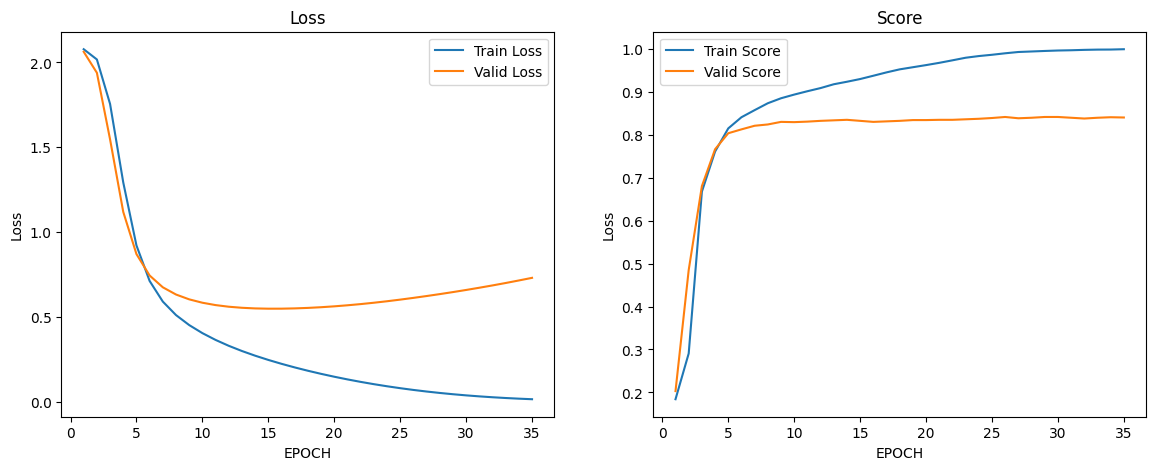

In [62]:
DrawPlot(result)
plt.show()

In [124]:
best_model = LSTMModel(input_size = 5000, output_size = 8, hidden_list = [100, 30],
                       act_func=F.relu, model_type='multiclass', num_layers=1)

best_model.load_state_dict(torch.load('best_model_tf-idf_0.8203.pth', weights_only=True))

<All keys matched successfully>

In [125]:
best_model.eval()
loaded_vectorizer = joblib.load('tfid_vectorizer_5000.pkl')
test_vector = loaded_vectorizer.transform(test_inputDF['clean_text'])
test_tensor_vector = torch.FloatTensor(test_vector.toarray())
test_logit = best_model(test_tensor_vector.unsqueeze(1))
test_pred = torch.argmax(test_logit, dim=1)
test_real = torch.tensor(test_targetDF.values).squeeze(1)

test_accuracy = ((test_pred == test_real).sum() / len(test_pred)).item()
print(f"test accuracy : {test_accuracy:.4f}")

test accuracy : 0.8344


In [126]:
print(test_pred)
print(test_real)

tensor([7, 5, 2,  ..., 6, 0, 1])
tensor([7, 5, 2,  ..., 6, 0, 1])


In [154]:
best_model.eval()
loaded_vectorizer = joblib.load('tfid_vectorizer_5000.pkl')
test_vector = loaded_vectorizer.transform(test_inputDF.iloc[:5, :]['clean_text'].values)
test_tensor_vector = torch.FloatTensor(test_vector.toarray())
test_logit = best_model(test_tensor_vector.unsqueeze(1))
test_pred = torch.argmax(test_logit, dim=1)
test_real = torch.tensor(test_targetDF.iloc[:5, :].values).squeeze(1)

print(test_pred)
print(test_real)

tensor([7, 5, 2, 2, 0])
tensor([7, 5, 2, 2, 0])


In [212]:
for i in range(0, 26):
    INDEX = i

    best_model.eval()
    loaded_vectorizer = joblib.load('tfid_vectorizer_5000.pkl')
    test_vector = loaded_vectorizer.transform(test_inputDF.iloc[[INDEX], :]['clean_text'].values)
    test_tensor_vector = torch.FloatTensor(test_vector.toarray())
    test_logit = best_model(test_tensor_vector.unsqueeze(1))
    test_pred = torch.argmax(test_logit, dim=1)
    test_real = torch.tensor(test_targetDF.iloc[[INDEX], :].values).squeeze(1)

    section_dict = {0 : '국내 여행', 1 : '게임', 2 : '취미', 3 : '해외 여행',
                    4 : '사진', 5 : '맛집', 6 : '스포츠', 7 : '자동차'}


    print(f"[INDEX{i}] 예측값 : {section_dict[test_pred.item()]}, 실제값 : {section_dict[test_real.item()]}\n")

[INDEX0] 예측값 : 자동차, 실제값 : 자동차

[INDEX1] 예측값 : 맛집, 실제값 : 맛집

[INDEX2] 예측값 : 취미, 실제값 : 취미

[INDEX3] 예측값 : 취미, 실제값 : 취미

[INDEX4] 예측값 : 국내 여행, 실제값 : 국내 여행

[INDEX5] 예측값 : 해외 여행, 실제값 : 해외 여행

[INDEX6] 예측값 : 취미, 실제값 : 해외 여행

[INDEX7] 예측값 : 스포츠, 실제값 : 스포츠

[INDEX8] 예측값 : 사진, 실제값 : 사진

[INDEX9] 예측값 : 맛집, 실제값 : 맛집

[INDEX10] 예측값 : 취미, 실제값 : 게임

[INDEX11] 예측값 : 자동차, 실제값 : 자동차

[INDEX12] 예측값 : 게임, 실제값 : 게임

[INDEX13] 예측값 : 게임, 실제값 : 게임

[INDEX14] 예측값 : 맛집, 실제값 : 맛집

[INDEX15] 예측값 : 사진, 실제값 : 사진

[INDEX16] 예측값 : 국내 여행, 실제값 : 해외 여행

[INDEX17] 예측값 : 사진, 실제값 : 사진

[INDEX18] 예측값 : 사진, 실제값 : 사진

[INDEX19] 예측값 : 사진, 실제값 : 사진

[INDEX20] 예측값 : 해외 여행, 실제값 : 해외 여행

[INDEX21] 예측값 : 자동차, 실제값 : 자동차

[INDEX22] 예측값 : 해외 여행, 실제값 : 해외 여행

[INDEX23] 예측값 : 해외 여행, 실제값 : 해외 여행

[INDEX24] 예측값 : 사진, 실제값 : 사진

[INDEX25] 예측값 : 해외 여행, 실제값 : 국내 여행



In [242]:
string = test_inputDF.iloc[0,:].values[0]
inputDF = pd.DataFrame([string], columns=['clean_text'])

best_model = LSTMModel(input_size = 5000, output_size = 8, hidden_list = [100, 30],
                       act_func=F.relu, model_type='multiclass', num_layers=1)
best_model.load_state_dict(torch.load('best_model_tf-idf_0.8203.pth', weights_only=True))

best_model.eval()
loaded_vectorizer = joblib.load('tfid_vectorizer_5000.pkl')
input_vector = loaded_vectorizer.transform(inputDF['clean_text'].values)
input_tensor_vector = torch.FloatTensor(input_vector.toarray())
input_logit = best_model(input_tensor_vector.unsqueeze(1))
pred = torch.argmax(input_logit, dim=1).item()

section_dict = {0 : '국내 여행', 1 : '게임', 2 : '취미', 3 : '해외 여행',
                4 : '사진', 5 : '맛집', 6 : '스포츠', 7 : '자동차'}

pred_section = section_dict[pred]
pred_section

'자동차'

In [213]:
INDEX = 1

best_model = LSTMModel(input_size = 5000, output_size = 8, hidden_list = [100, 30],
                       act_func=F.relu, model_type='multiclass', num_layers=1)

best_model.load_state_dict(torch.load('best_model_tf-idf_0.8203.pth', weights_only=True))

best_model.eval()
loaded_vectorizer = joblib.load('tfid_vectorizer_5000.pkl')
test_vector = loaded_vectorizer.transform(test_inputDF.iloc[[INDEX], :]['clean_text'].values)
test_tensor_vector = torch.FloatTensor(test_vector.toarray())
test_logit = best_model(test_tensor_vector.unsqueeze(1))
test_pred = torch.argmax(test_logit, dim=1)
test_real = torch.tensor(test_targetDF.iloc[[INDEX], :].values).squeeze(1)

section_dict = {0 : '국내 여행', 1 : '게임', 2 : '취미', 3 : '해외 여행',
                4 : '사진', 5 : '맛집', 6 : '스포츠', 7 : '자동차'}


print(f"[INDEX{i}] 예측값 : {section_dict[test_pred.item()]}, 실제값 : {section_dict[test_real.item()]}\n")

[INDEX25] 예측값 : 맛집, 실제값 : 맛집

